In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import random
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from keras.preprocessing.text import Tokenizer
from collections import Counter
from tensorflow.keras import layers
from keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud, STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Data

In [402]:
data = pd.read_csv("20191002-items.csv")
data1 = pd.read_csv("20191002-reviews.csv")

In [403]:
data.head()

itemId                 category  ... totalReviews retrievedDate
0  100002528  beli-harddisk-eksternal  ...            8    2019-10-02
1  100003785  beli-harddisk-eksternal  ...            3    2019-10-02
2  100004132  beli-harddisk-eksternal  ...            2    2019-10-02
3  100004505  beli-harddisk-eksternal  ...           11    2019-10-02
4  100005037  beli-harddisk-eksternal  ...            1    2019-10-02

[5 rows x 9 columns]

In [404]:
data1.head()

itemId                 category  ...  clientType  retrievedDate
0  100002528  beli-harddisk-eksternal  ...  androidApp     2019-10-02
1  100002528  beli-harddisk-eksternal  ...  androidApp     2019-10-02
2  100002528  beli-harddisk-eksternal  ...  androidApp     2019-10-02
3  100002528  beli-harddisk-eksternal  ...  androidApp     2019-10-02
4  100002528  beli-harddisk-eksternal  ...  androidApp     2019-10-02

[5 rows x 15 columns]

In [405]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [406]:
for i in data.columns:
    print(f"{[i]} \n {data[i].unique()} \n")

['itemId'] 
 [100002528 100003785 100004132 ...   9830166   9973399   9973500] 

['category'] 
 ['beli-harddisk-eksternal' 'beli-laptop' 'beli-smart-tv'
 'jual-flash-drives' 'shop-televisi-digital'] 

['name'] 
 ['TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free Bracket TV - Hitam - Khusus Jabodetabek'
 'TOSHIBA Full HD Smart LED TV 40" - 40L5650VJ - Hitam - Khusus Jabodetabek'
 ' Samsung 40 Inch Full HD Flat LED Digital TV 40J5000' ...
 'EVA Case Shockproof Case Bag for External HDD 2.5 Inch / Power Bank - HD402  '
 'SanDisk Cruzer Blade USB Flash Drive 32GB'
 'Transformer Ravage USB 2.0 Flash Drive'] 

['brandName'] 
 ['Toshiba' 'LG' 'Sharp' 'Lenovo' 'SanDisk' 'Asus' 'Philips' 'Acer'
 'Maxtor' 'Orico' 'HP' 'Transformers' 'WD' 'Panasonic' 'Hitachi' 'Sony'
 'Ikedo' 'Seagate' 'Sanyo' 'Ichiko' 'Polytron' 'Kevindo' 'Xiaomi'
 'VANDISK' 'VAKIND' 'Advance' 'USB' 'Samsung' 'China OEM' 'thinch'
 'Kingston' 'Adata' 'TCL' 'Billionton' 'V-Gen' 'Dell' 'No Brand' 'JUC'
 'Microsoft' 'Coocaa' 'DBest' 'Tr

In [407]:
for i in data1.columns:
    print(f"{[i]} \n {data1[i].unique()} \n")

['itemId'] 
 [100002528 100003785 100004132 ...   9830166   9973399   9973500] 

['category'] 
 ['beli-harddisk-eksternal' 'beli-laptop' 'beli-smart-tv'
 'jual-flash-drives' 'shop-televisi-digital'] 

['name'] 
 ['Kamal U.' 'yofanca m.' 'Lazada Customer' ... 'ranti O.' 'Yunda A.'
 'danang C.'] 

['rating'] 
 [5 4 1 3 2] 

['originalRating'] 
 [nan  1.] 

['reviewTitle'] 
 [nan 'ok mantaaapppp barang sesuai pesanan.. good'
 'ada pengirimn ntb bima' ... 'kok kagak bisa kebaca aduhh kecewa'
 'Gagal di kirim' 'Kenapa tv nya ko hitam putih.'] 

['reviewContent'] 
 ['bagus  mantap dah sesui pesanan' 'Bagus, sesuai foto'
 'okkkkk mantaaaaaaapppp ... goood' ...
 'barang ok, pengiriman super lambat dn trpaksa jemput sendiri. tolong lazada  jgn kirim pakek SICEPAT bukan mangkin cepat mngkin emosi smpai dilokasi tv ditimpa2. super kecewa dengan pengirimannya'
 'mantapp,, terima kasih lazadaaa,, tv coocaa 40" sudah diterima dengan baik, sudah dicoba bagus.. recommended'
 'Wow Keren Abis,, LED TV K

In [408]:
data1.isna().sum()

itemId                 0
category               0
name                   0
rating                 0
originalRating    203779
reviewTitle       180383
reviewContent      96758
likeCount              0
upVotes                0
downVotes              0
helpful                0
relevanceScore         0
boughtDate          7107
clientType             0
retrievedDate          0
dtype: int64

In [409]:
data_eda = data1[["category", "rating", "boughtDate", "clientType"]]
data_use = data1[["reviewContent", "rating"]]

In [410]:
data_use.dropna(inplace=True)
data_use.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


reviewContent    0
rating           0
dtype: int64

Data yang digunakan ada 203787 baris dengan 15 kolom, terdapat 96758 missing value dari kolom review, karena kolom tersebut yang akan digunakan, maka saya memisahkan kolom reviewContent dan rating dengan kolom yang lain agar saat menghapus missing values, kolom lain yang memiliki missing value tidak terhapus juga, karena bisa menghilangkan sebagian informasi yang ada di kolom reviewcontent ini, dan kenapa missing value saya hapus karena data ini berbentuk review sehingga jika di isi akan membingungkan, maka saya hapus

In [411]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107029 entries, 0 to 203786
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewContent  107029 non-null  object
 1   rating         107029 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [412]:
data_use

reviewContent  rating
0                         bagus  mantap dah sesui pesanan       5
1                                      Bagus, sesuai foto       4
2                        okkkkk mantaaaaaaapppp ... goood       5
3                                            bagus sesuai       4
7                                                    bima       1
...                                                   ...     ...
203780                                             Wkwkwk       5
203781  seller incapable to keep his product page clea...       1
203782               barang bagus dengan harga kompetitif       5
203785  Ok.thank lazada Pagi order sore barang nyampe ...       3
203786  semua fitur berfungsi,harganya cukup murah. AK...       5

[107029 rows x 2 columns]

# Text Preprocessing

In [413]:
data_use['category'] = data_use['rating'].map({1 : 'negatif', 2 : 'negatif', 3 : 'netral', 4 : 'positif', 5 : 'positif'})
data_use

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


reviewContent  rating category
0                         bagus  mantap dah sesui pesanan       5  positif
1                                      Bagus, sesuai foto       4  positif
2                        okkkkk mantaaaaaaapppp ... goood       5  positif
3                                            bagus sesuai       4  positif
7                                                    bima       1  negatif
...                                                   ...     ...      ...
203780                                             Wkwkwk       5  positif
203781  seller incapable to keep his product page clea...       1  negatif
203782               barang bagus dengan harga kompetitif       5  positif
203785  Ok.thank lazada Pagi order sore barang nyampe ...       3   netral
203786  semua fitur berfungsi,harganya cukup murah. AK...       5  positif

[107029 rows x 3 columns]

In [414]:
data_use['category'] = data_use['category'].map({'positif' : 2, 'negatif' : 0, 'netral' : 1})
data_use

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


reviewContent  rating  category
0                         bagus  mantap dah sesui pesanan       5         2
1                                      Bagus, sesuai foto       4         2
2                        okkkkk mantaaaaaaapppp ... goood       5         2
3                                            bagus sesuai       4         2
7                                                    bima       1         0
...                                                   ...     ...       ...
203780                                             Wkwkwk       5         2
203781  seller incapable to keep his product page clea...       1         0
203782               barang bagus dengan harga kompetitif       5         2
203785  Ok.thank lazada Pagi order sore barang nyampe ...       3         1
203786  semua fitur berfungsi,harganya cukup murah. AK...       5         2

[107029 rows x 3 columns]

Disini saya melakukan pengkategorian dari kolom review dimana jika rating 1-2 termasuk rating negatif, 3 netral dan 4-5 termasuk review positif

### Case Folding

In [415]:
def preproc(kata):
    words = re.sub(r'\d+', ' ', kata)
    words = words.lower()
    words = words.translate(str.maketrans("","", string.punctuation))
    words = re.sub(r"@[A-Za-z0-9]+", '', words) 
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE)
    words = regrex_pattern.sub(r'',words)
    return(words)

In [416]:
data_use['preproc'] = data_use['reviewContent'].apply(lambda x : preproc(x))
sample = data_use.loc[1]['preproc']
print(sample)

bagus sesuai foto


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Case folding dilakukan untuk menghapus angka, konvert ke huruf kecil, menghapus tanda baca, menghapus whitespace dan menghapus emoji

### Stopwords

In [417]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('indonesian')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [418]:
data_use['preproc'] = data_use['preproc'].apply(remove_stopwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Stopwords disini dilakukan untuk menghapus kata2 yang kurang penting seperti "dan", "atau", dll

### Stemming

In [ ]:
fac = StemmerFactory()
stemmer = factory.create_stemmer()

data_use["preproc"] = [(stemmer.stem(i)) for i in data_use["preproc"]]

# EDA

In [419]:
cat=[]
for i in data['brandName']:
    for j in str(i).split(','):
        cat.append(j)
categories = pd.DataFrame([pd.Series(cat).value_counts().index,pd.Series(cat).value_counts()]).transpose()
categories = categories.rename(columns={0:'brand',1:'count'})

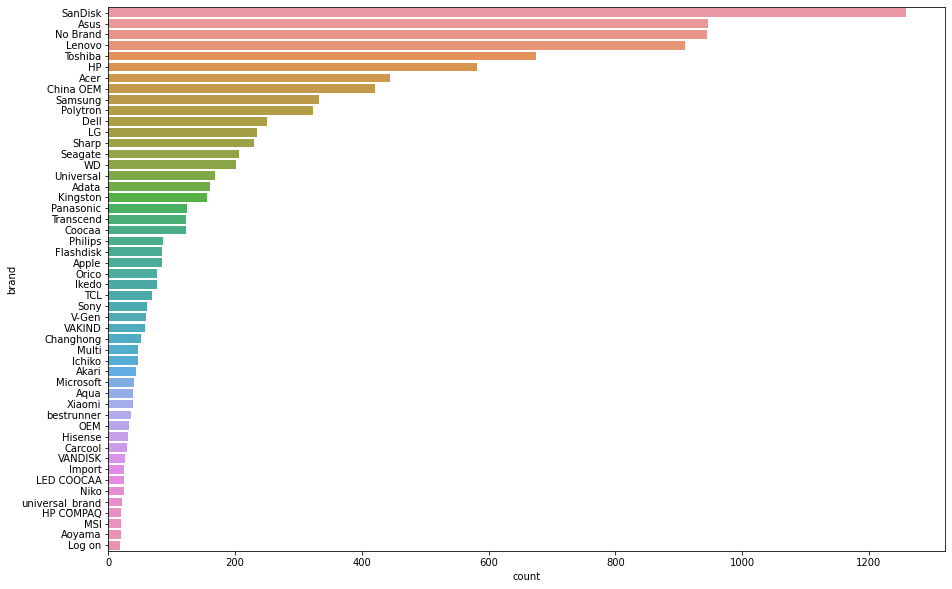

In [420]:
plt.figure(figsize = (15,10))
e = sns.barplot(data=categories.head(50), y='brand', x='count')

Dari grafik diatas, barang yang paling banyak di review adalah barang dengan merk SanDisk, asus dan no brand, no brand disini bisa menandakan bahwa brand tersebut tidak diketahui brand jenis apa

In [421]:
count=[]
for i in data_use['preproc']:
    for j in str(i).split():
        count.append(j)
words_count = pd.DataFrame([pd.Series(count).value_counts().index,pd.Series(count).value_counts()]).transpose()
words_count = words_count.rename(columns={0:'words',1:'count'})

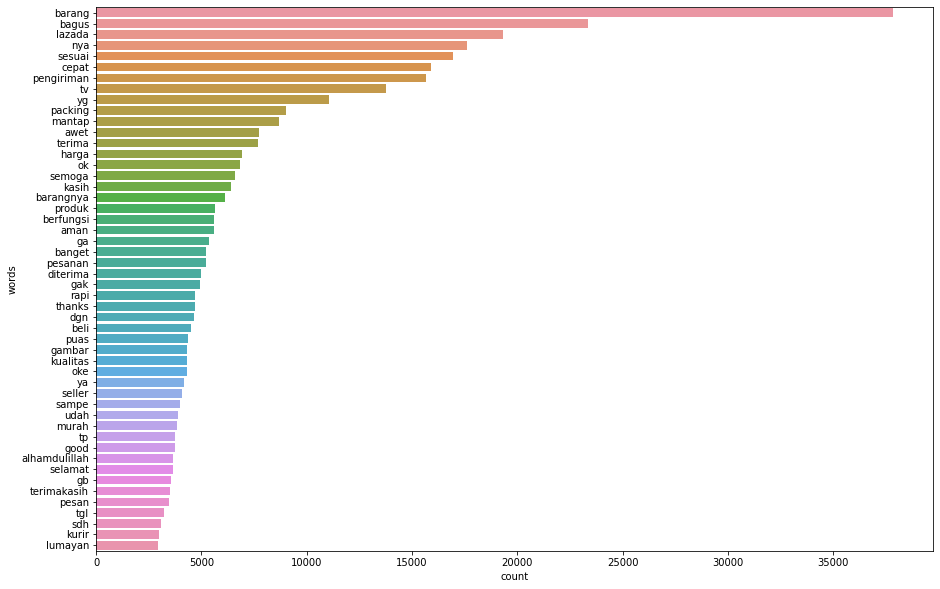

In [422]:
plt.figure(figsize = (15,10))
co = sns.barplot(data=words_count.head(50), y='words', x='count')

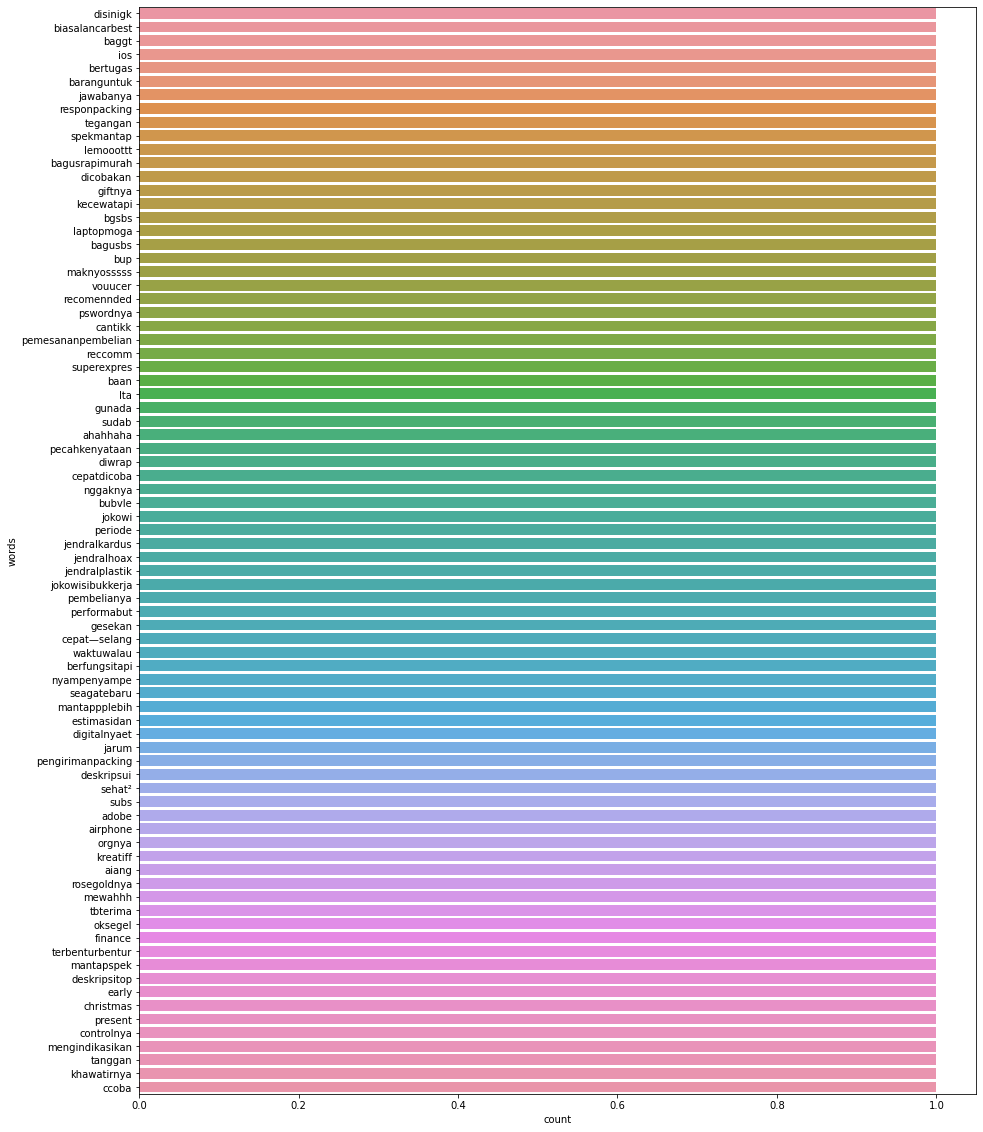

In [423]:
plt.figure(figsize = (15,20))
co = sns.barplot(data=words_count.tail(80), y='words', x='count')

Kata yang paling banyak dipakai adalah kata barang, bagus, dan kata yang paling sedikit dipakai ini kebanyakan berupa 2 kata tetapi tidak dipisahkan menggunakan spasi.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


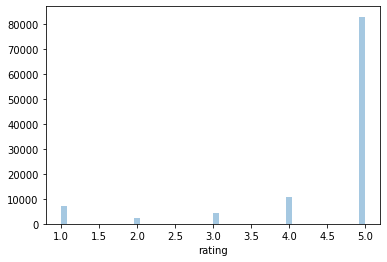

In [424]:
sns.distplot(data_use['rating'], kde=False)

Dari data ini kebanyakan pelanggan memberikan rating 4-5 atau memberikan review positif terhadap barang yang ada di e-commerce ini



### Wordcloud

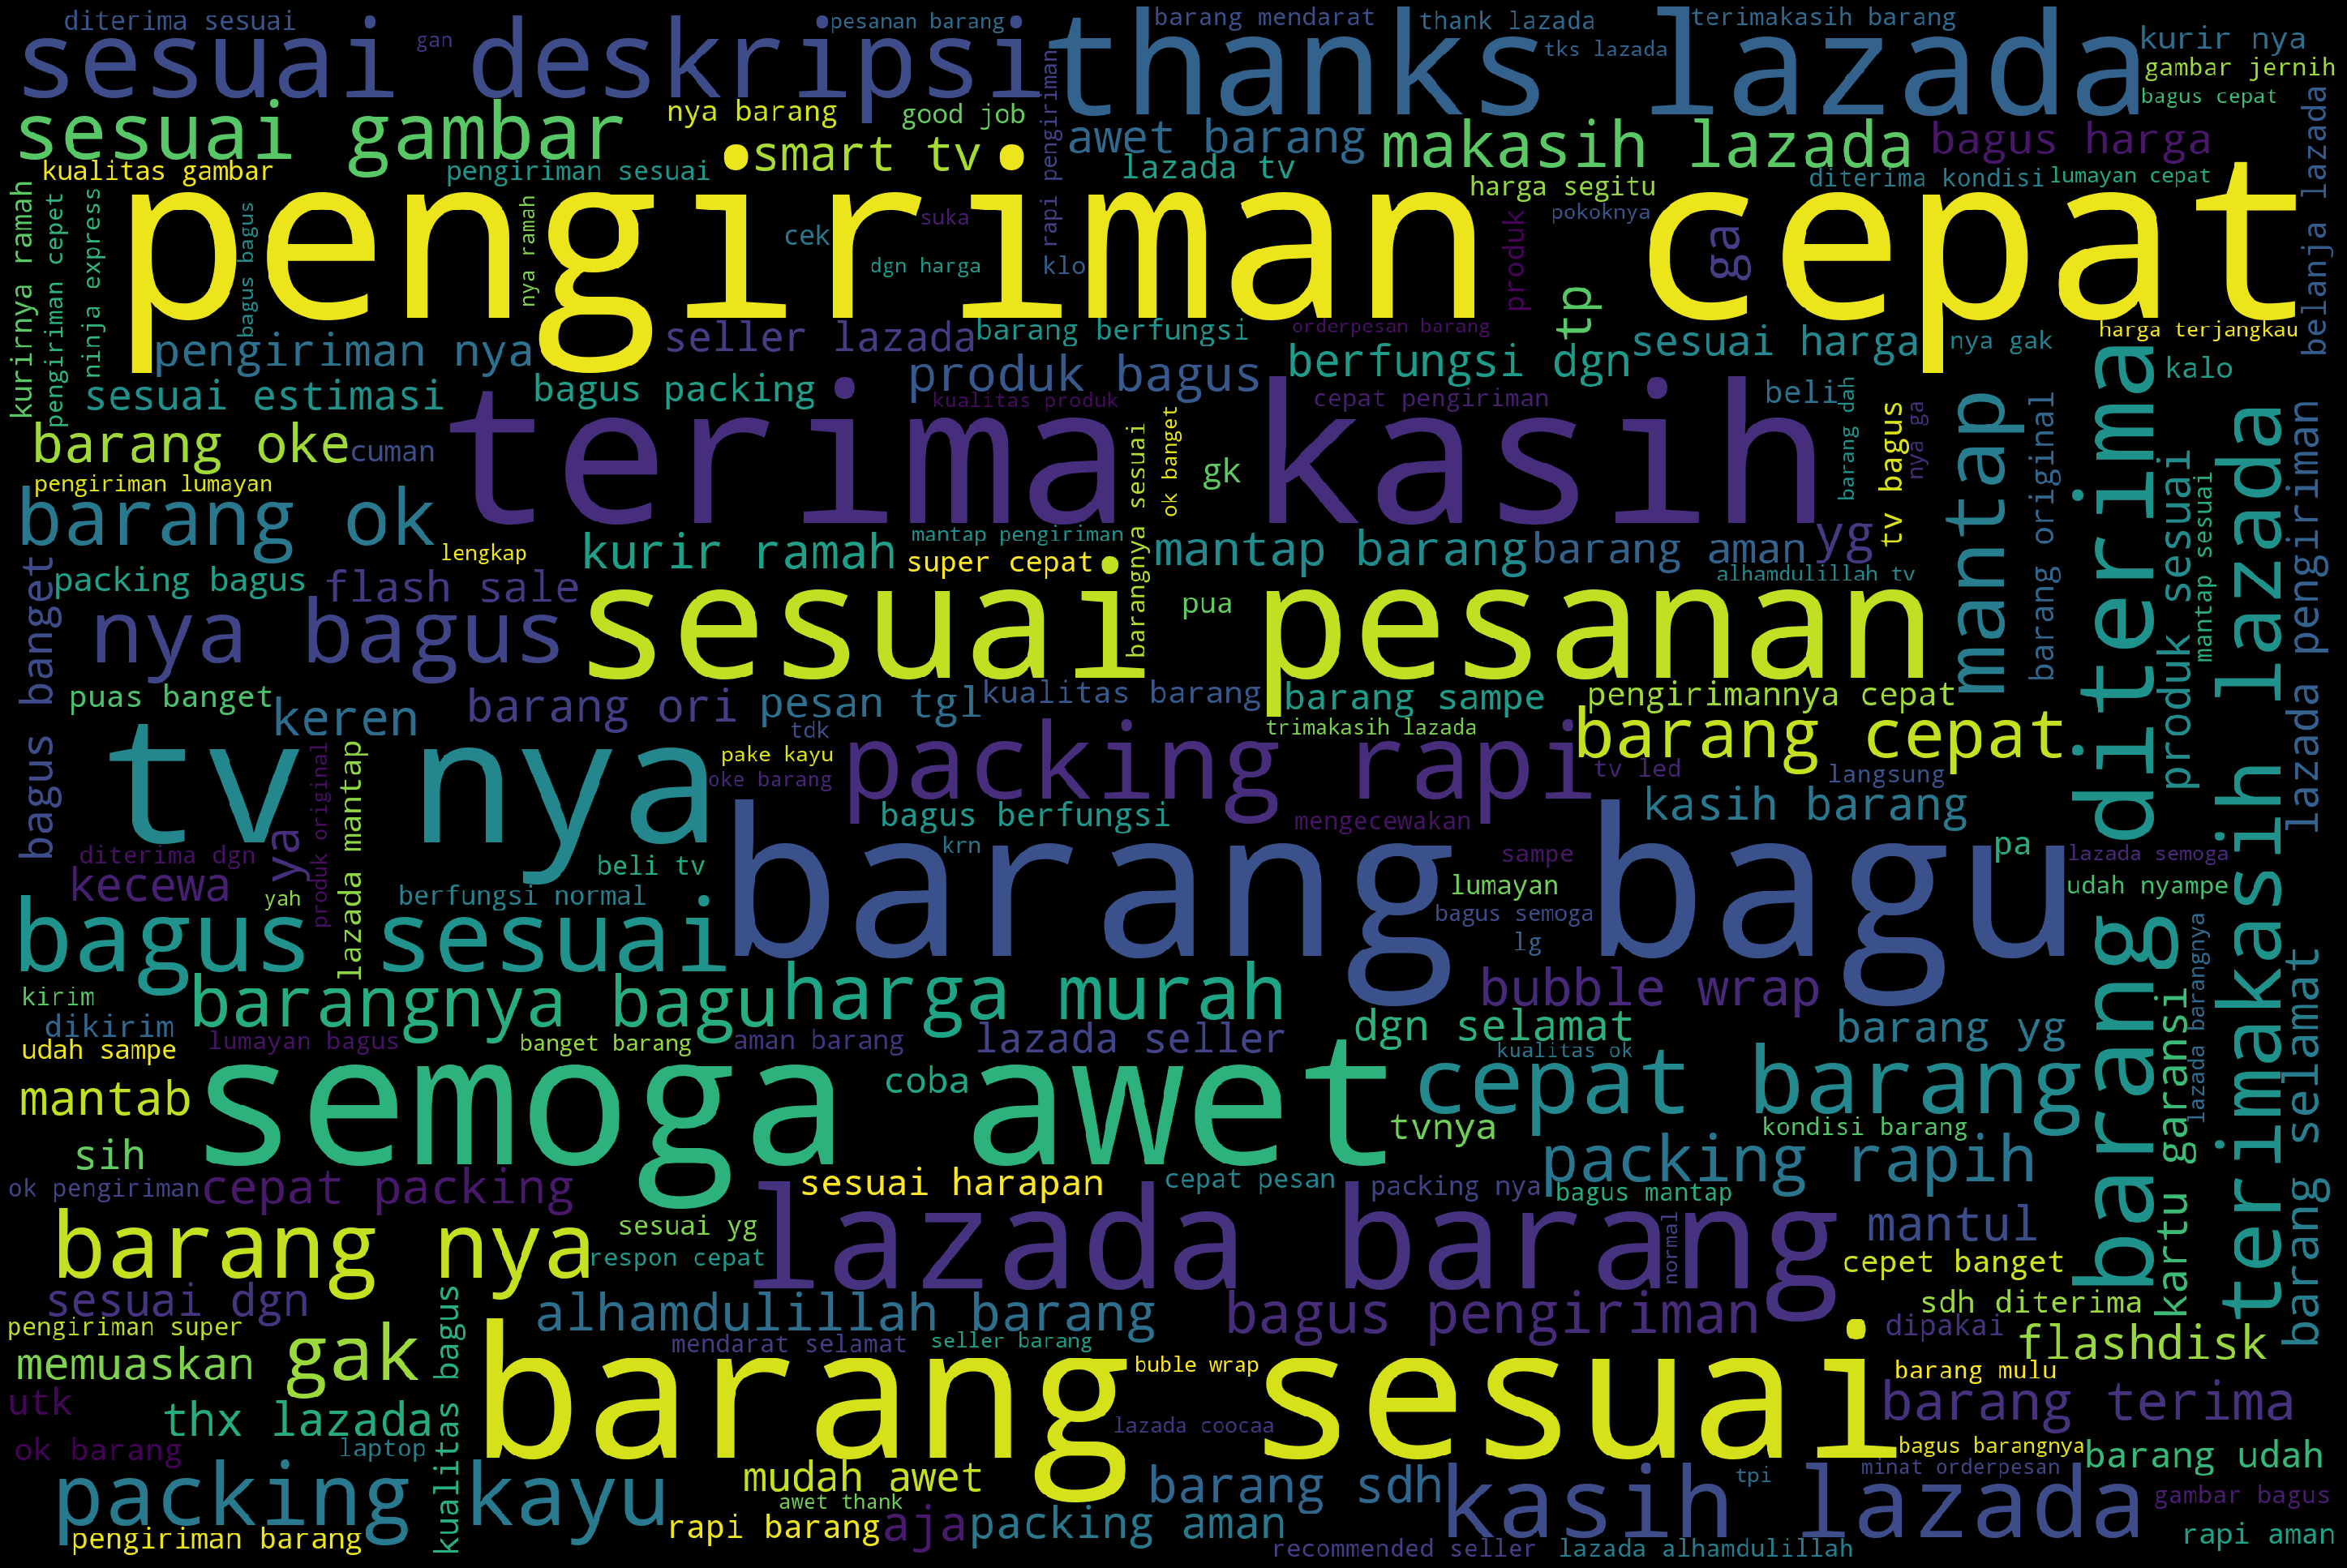

In [425]:
txt = ' '.join([i for i in data_use['preproc']])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(txt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [426]:
neg = data_use[data_use['category'] == 0]
net = data_use[data_use['category'] == 1]
pos = data_use[data_use['category'] == 2]

### Negative Review

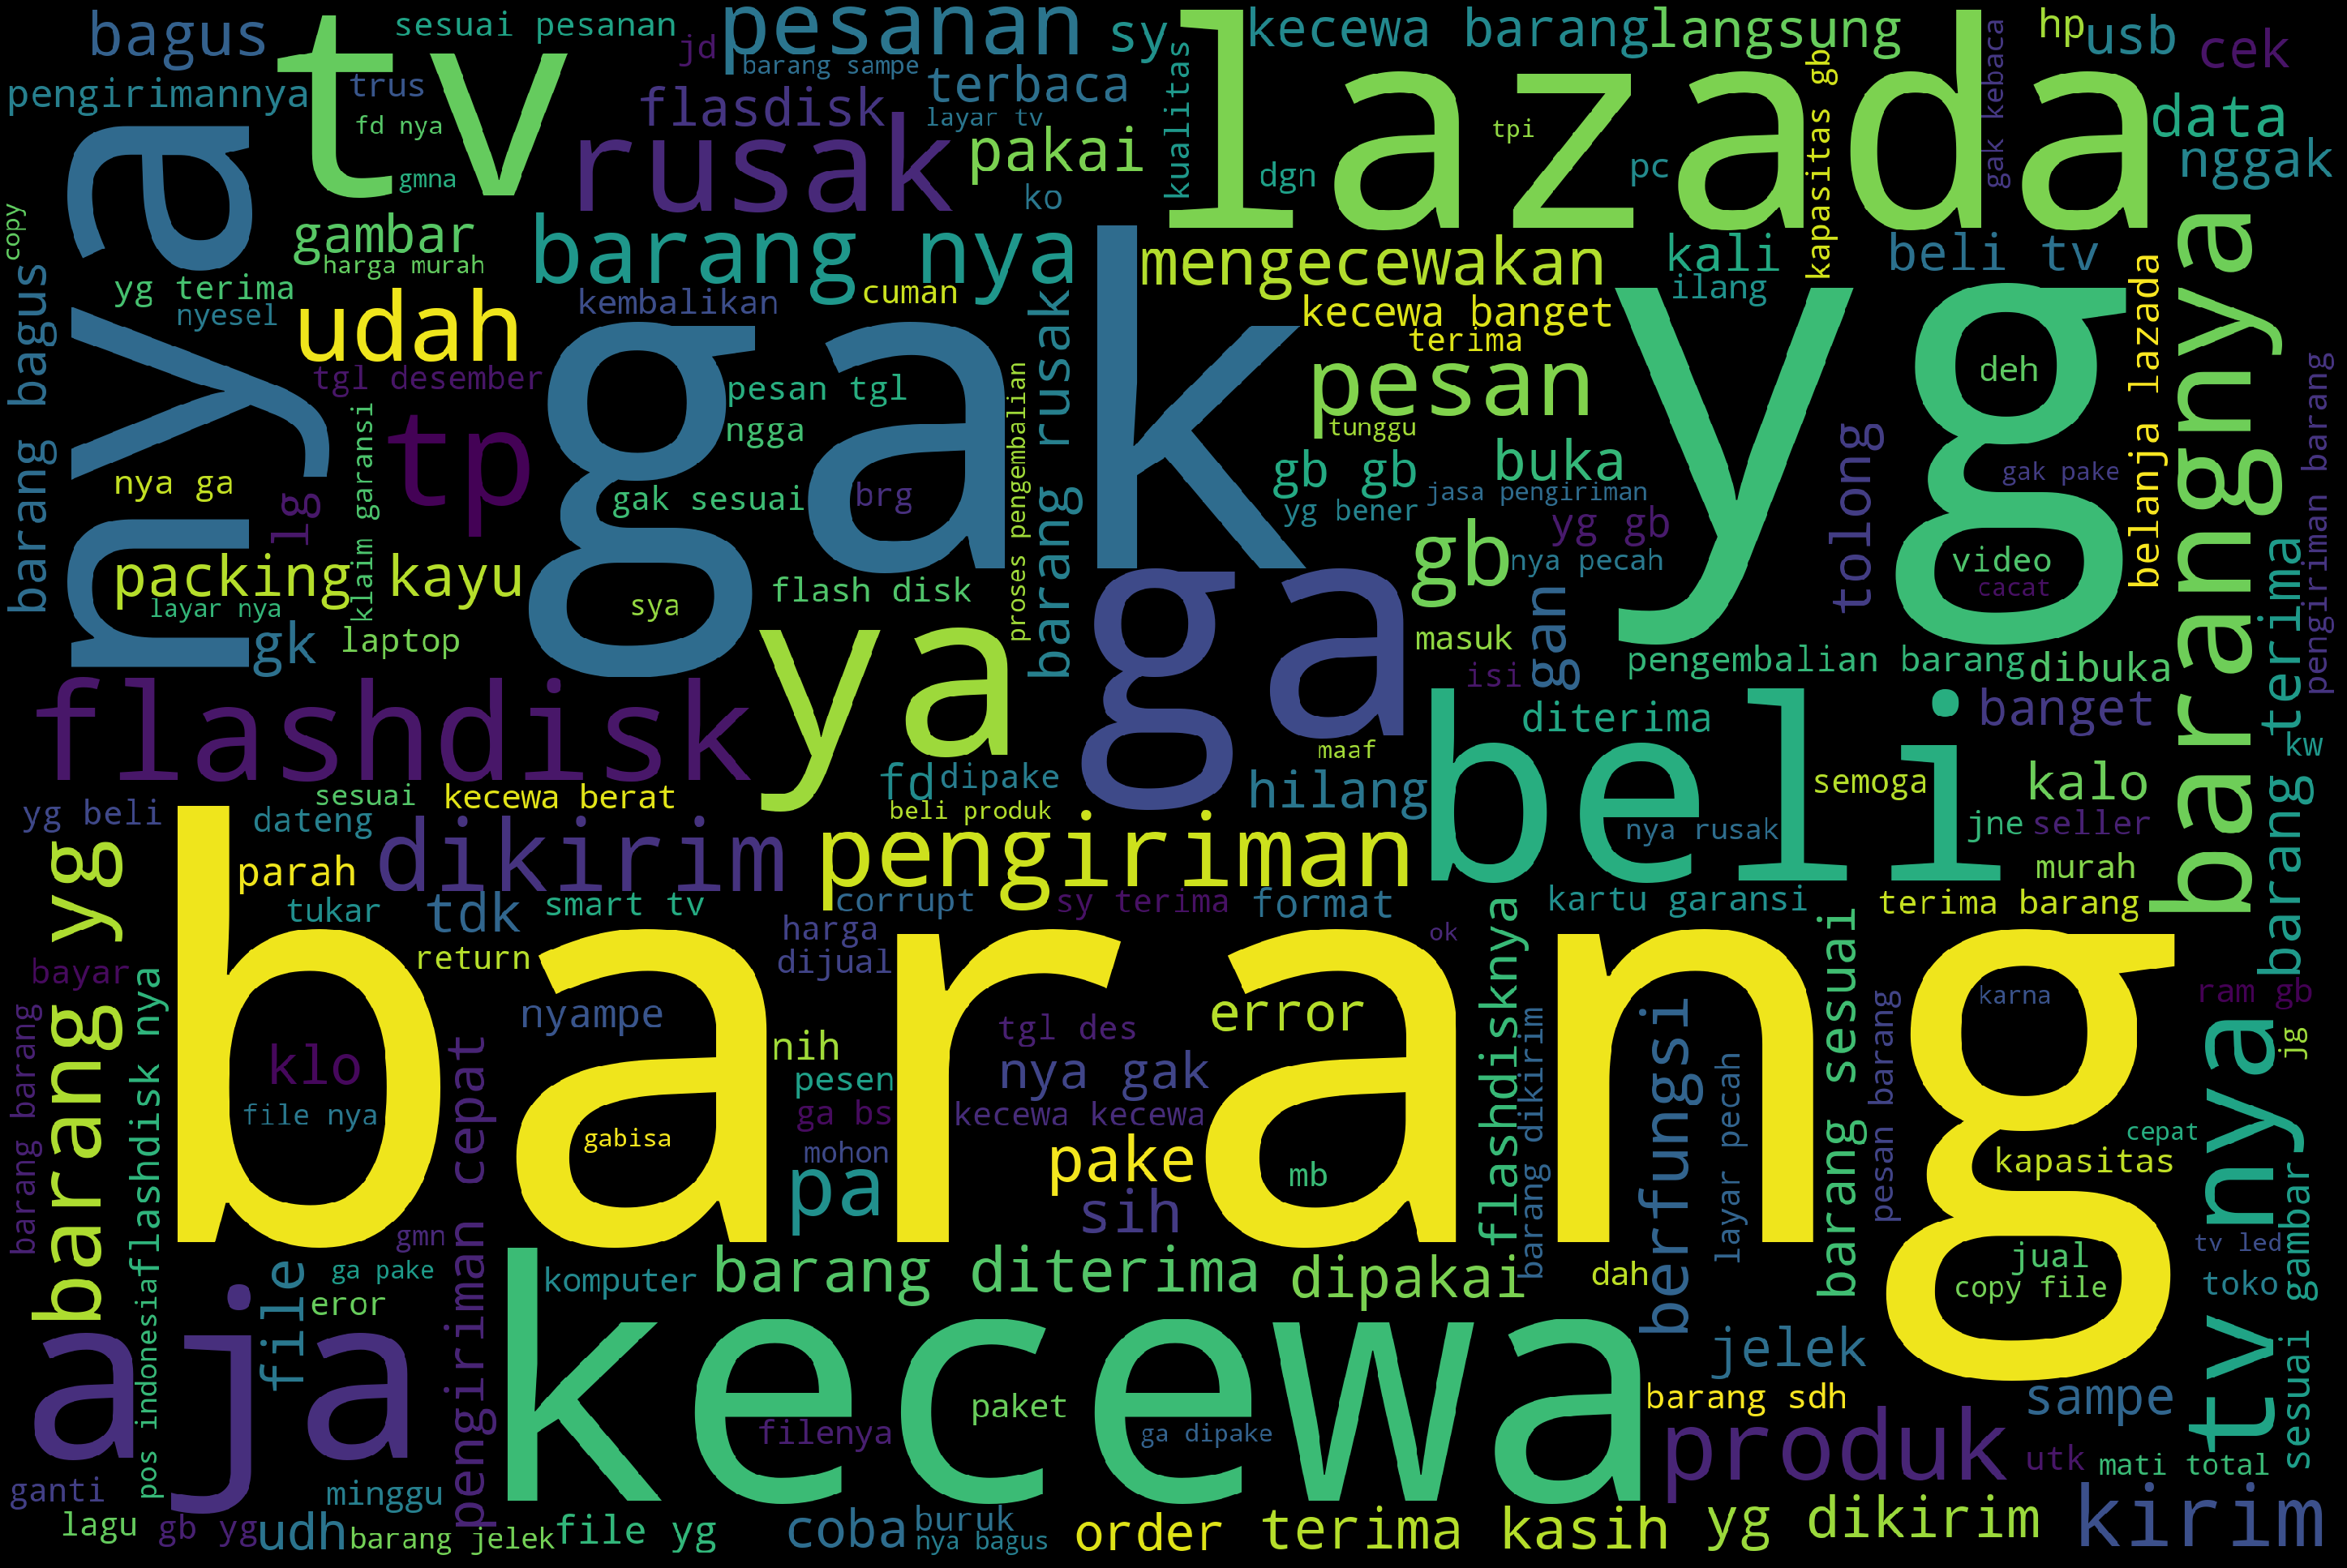

In [427]:
txt = ' '.join([i for i in neg['preproc']])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(txt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [428]:
count=[]
for i in neg['preproc']:
    for j in str(i).split():
        count.append(j)
words_count = pd.DataFrame([pd.Series(count).value_counts().index,pd.Series(count).value_counts()]).transpose()
words_count = words_count.rename(columns={0:'words',1:'count'})

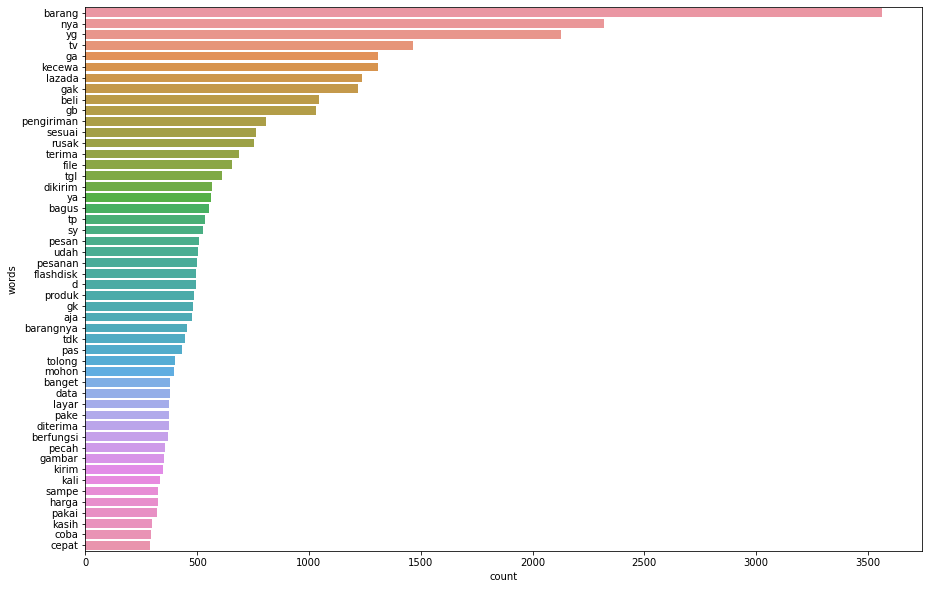

In [429]:
plt.figure(figsize = (15,10))
co = sns.barplot(data=words_count.head(50), y='words', x='count')

Dari grafik dan wordcloud diatas, di bagian review negatif, kata yang paling banyak adalah barang, kecewa, rusak, ga, sesuai, dan pengiriman, ini menandakan bahwa review negatif dapat berkaitan dengan barang yang rusak, tidak sesuai dan juga pengiriman yang lama, bisa jadi hal tersebut yang paling banyak dikeluhkan oleh pelanggan.

### Neutral Review

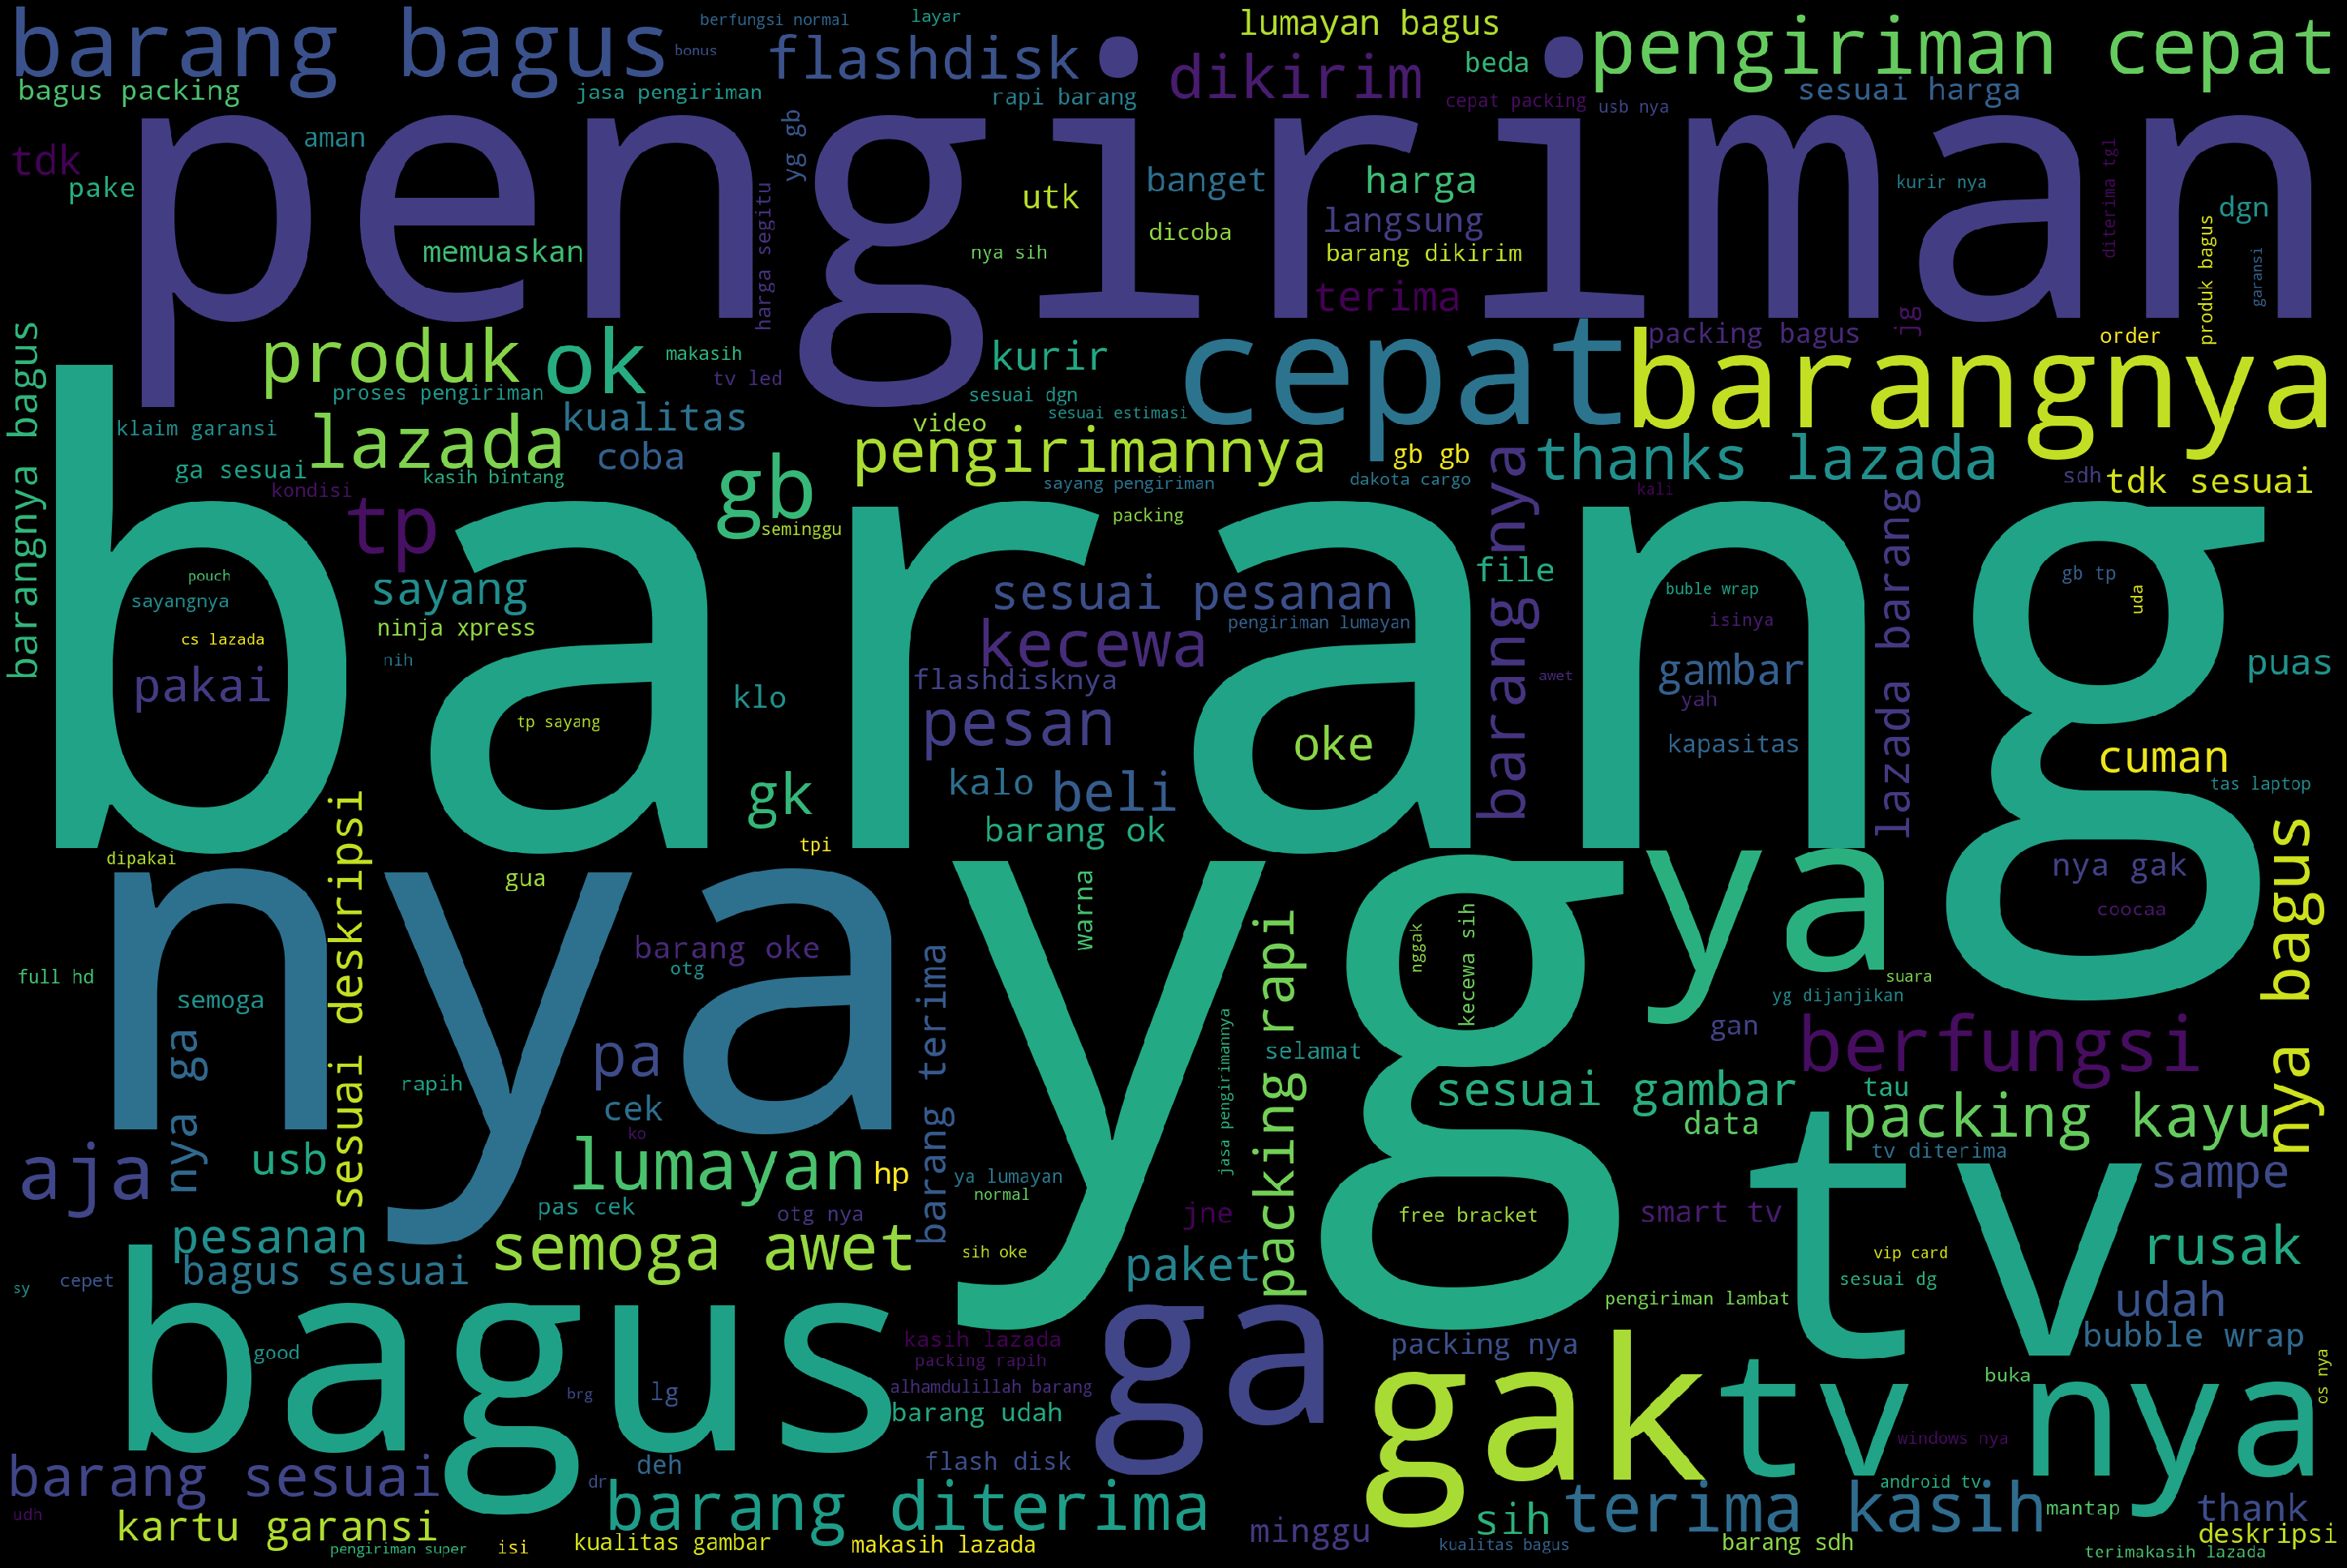

In [430]:
txt = ' '.join([i for i in net['preproc']])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(txt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [431]:
count=[]
for i in net['preproc']:
    for j in str(i).split():
        count.append(j)
words_count = pd.DataFrame([pd.Series(count).value_counts().index,pd.Series(count).value_counts()]).transpose()
words_count = words_count.rename(columns={0:'words',1:'count'})

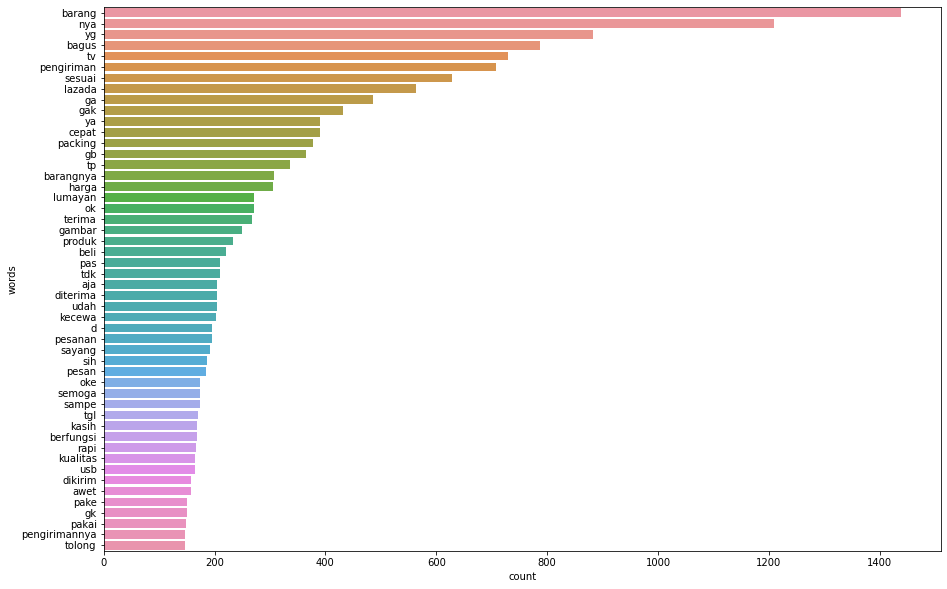

In [432]:
plt.figure(figsize = (15,10))
co = sns.barplot(data=words_count.head(50), y='words', x='count')

Untuk review netral, kata yang paling banyak tidak jauh berbeda dengan bagian negatif, namun ada kata "tapi" atau "tp" yang bisa jadi menandakan bahwa pelanggan tidak sepenuhnya puas dengan barang atau pengirimanya

### Positive Review

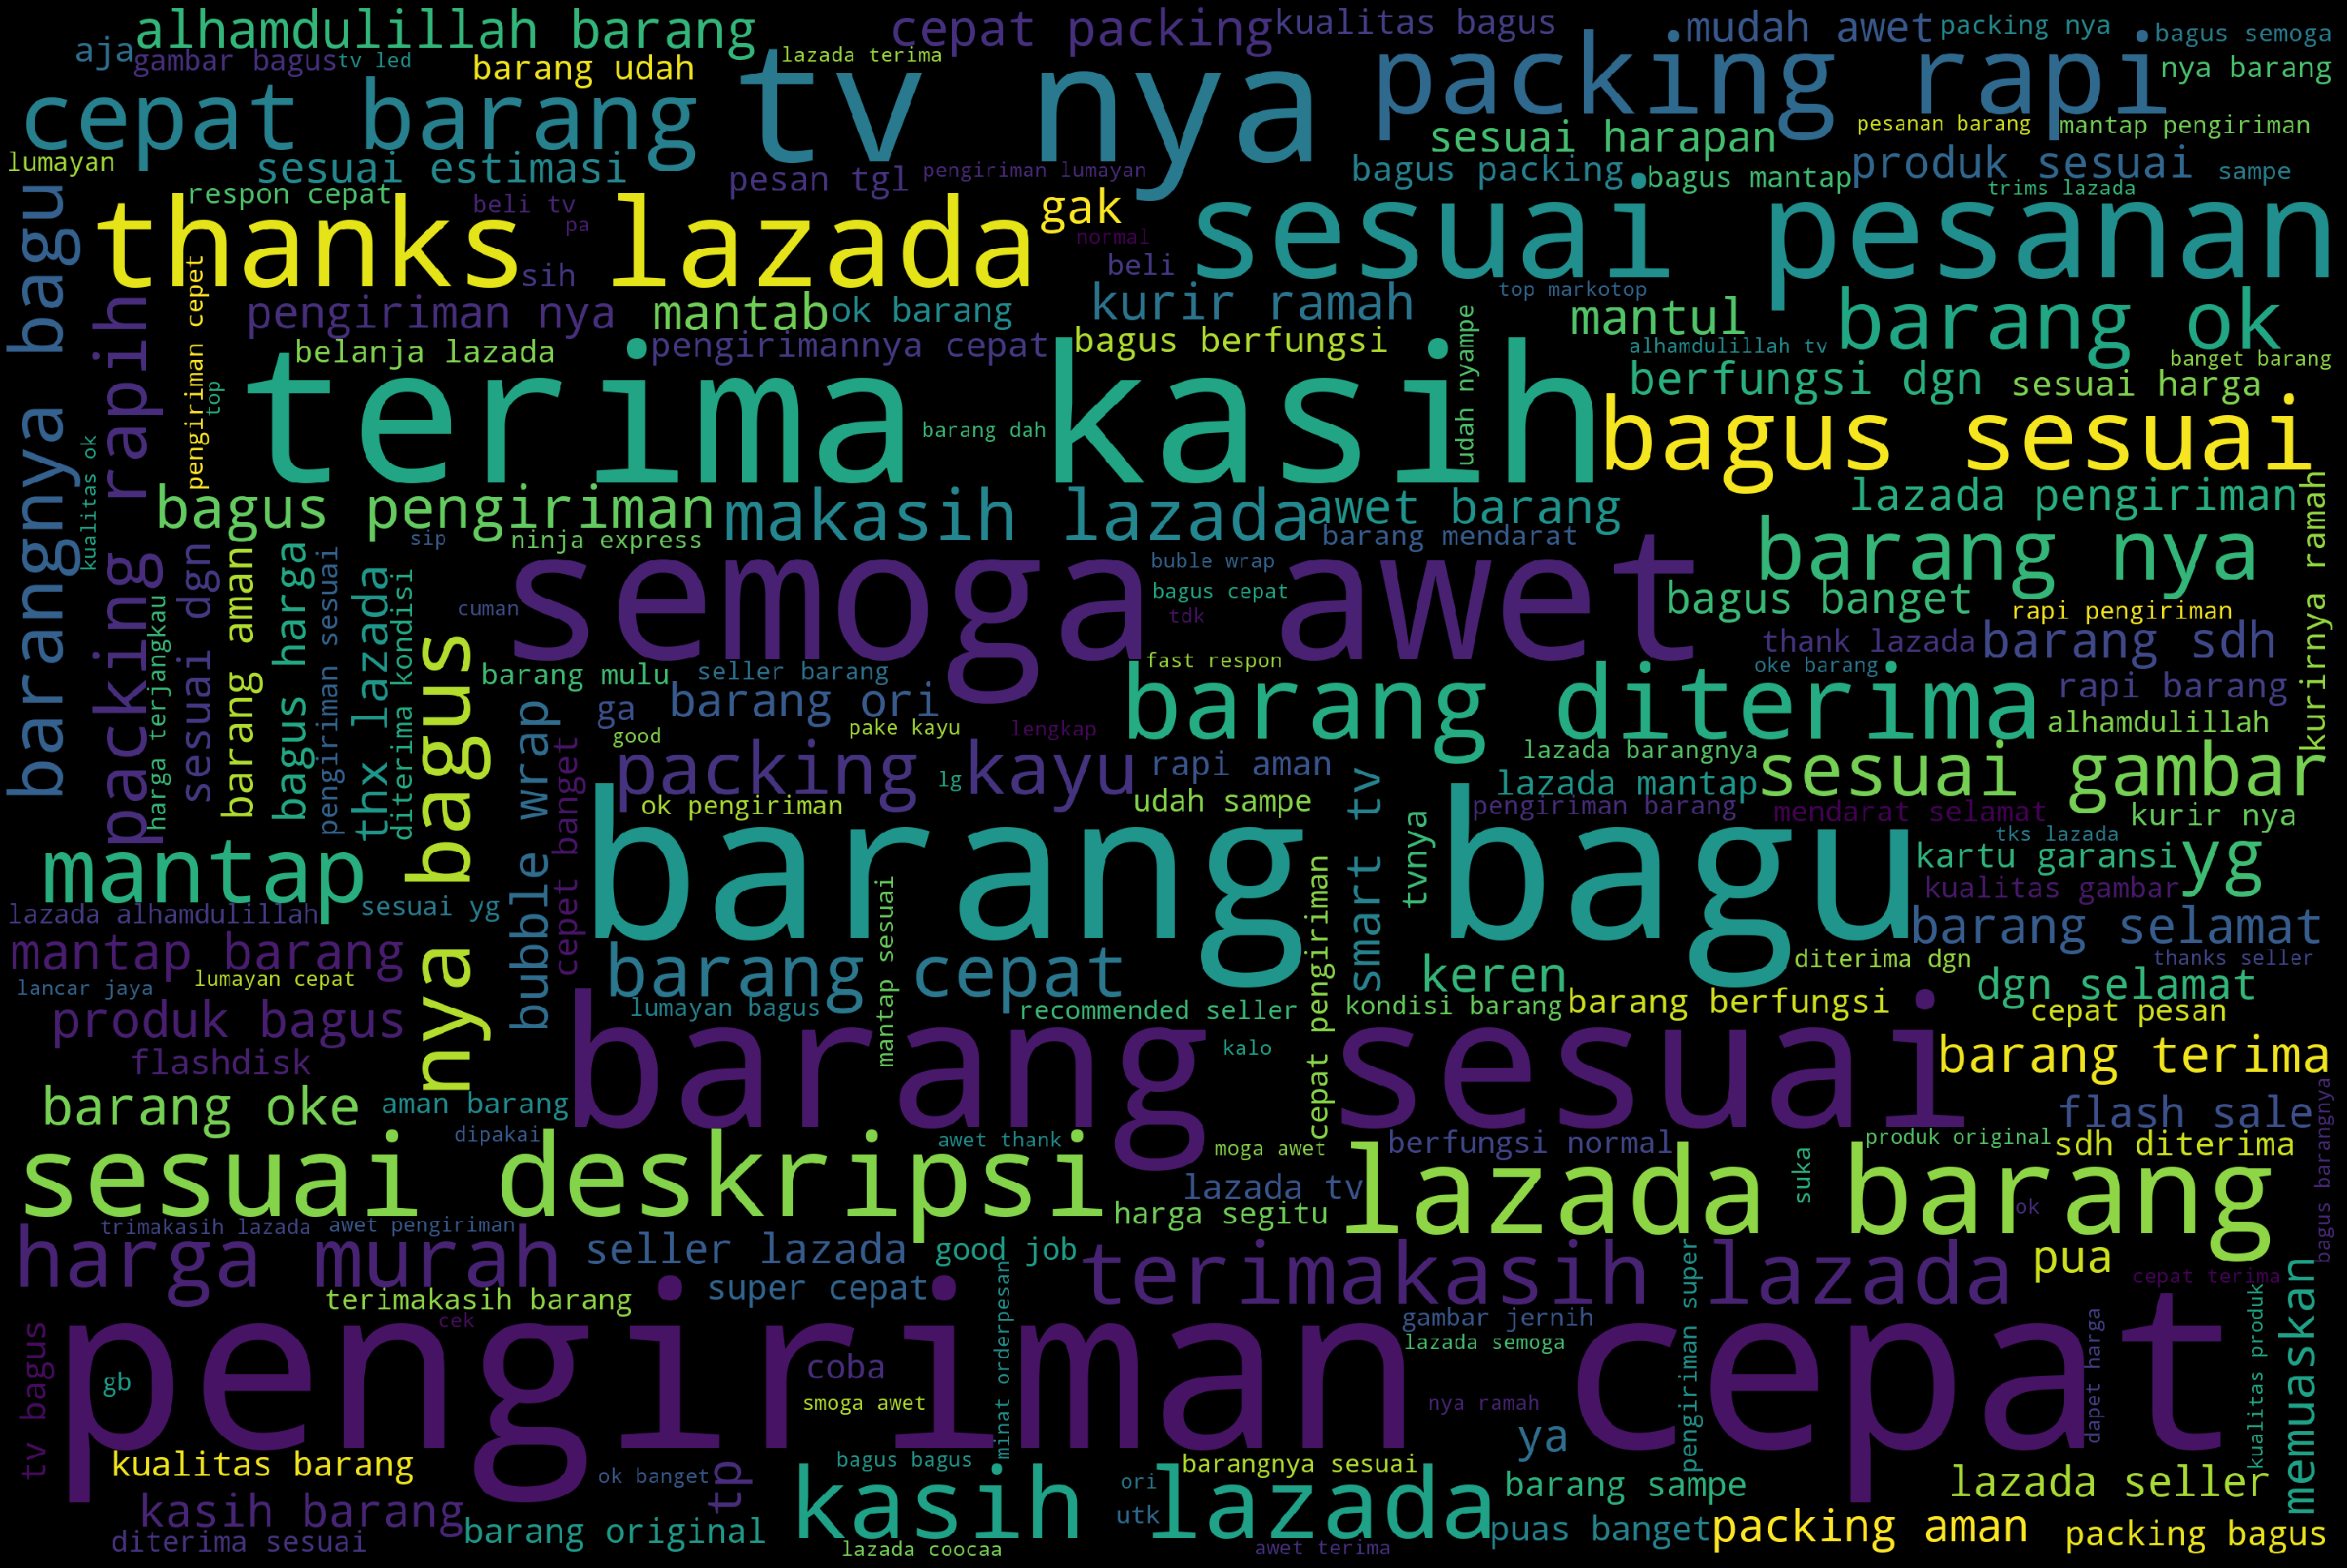

In [433]:
txt = ' '.join([i for i in pos['preproc']])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(txt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [434]:
count=[]
for i in pos['preproc']:
    for j in str(i).split():
        count.append(j)
words_count = pd.DataFrame([pd.Series(count).value_counts().index,pd.Series(count).value_counts()]).transpose()
words_count = words_count.rename(columns={0:'words',1:'count'})

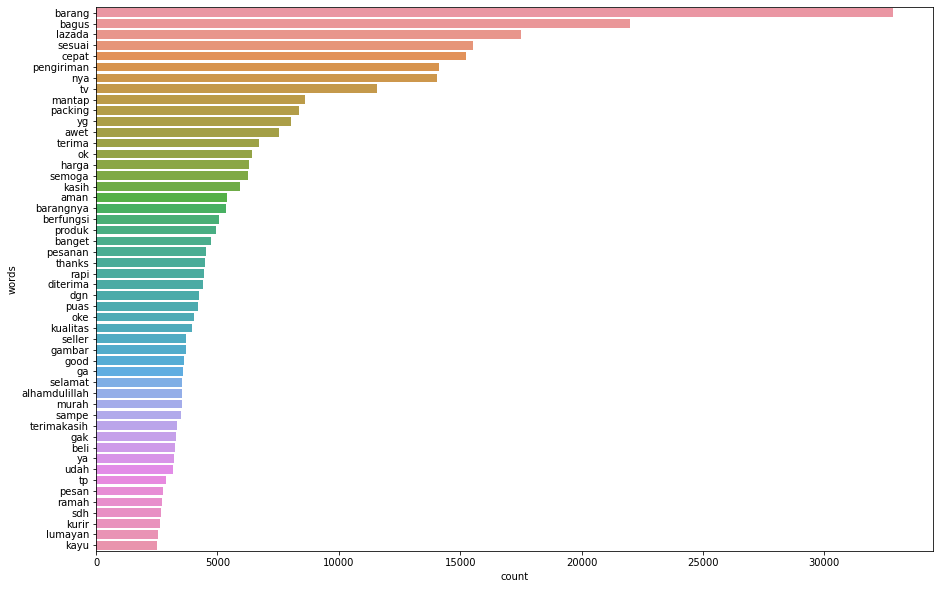

In [435]:
plt.figure(figsize = (15,10))
co = sns.barplot(data=words_count.head(50), y='words', x='count')

Untuk bagian review positif, kata yang paling banyak adalah barang, bagus, sesuai, cepat, berarti, kata ini menandakan bahwa review positif ini ditujukan untuk barang yang bagus, sesuai dan pengiriman yang cepat



Jadi, berdasarkan dari kata2 yang paling banyak keluar di bagian negatif review, pengiriman dan kesesuaian barang dengan gambar dapat menjadi perhatian oleh pemilih toko dan pihak e-commerce, mengingat kata tersebut paling banyak keluar, jadi perlu diperhatikan 2 faktor tersebut, contohnya pengiriman yang terjadwal terhitung dari selesainya pembayaran yang dilakukan oleh pelanggan, atau gambar produk yang menggunakan gambar asli, sehingga pelanggan tidak merasa tertipu, setidaknya 2 faktor itu yang diperhatikan jika tidak mau kehilangan pelanggan

# Modeling

In [436]:
data_use.head(5)

reviewContent  ...                         preproc
0   bagus  mantap dah sesui pesanan  ...  bagus mantap dah sesui pesanan
1                Bagus, sesuai foto  ...               bagus sesuai foto
2  okkkkk mantaaaaaaapppp ... goood  ...    okkkkk mantaaaaaaapppp goood
3                      bagus sesuai  ...                    bagus sesuai
7                              bima  ...                            bima

[5 rows x 4 columns]

In [437]:
data_f = data_use[['preproc', 'category']]
data_f

preproc  category
0                          bagus mantap dah sesui pesanan         2
1                                       bagus sesuai foto         2
2                            okkkkk mantaaaaaaapppp goood         2
3                                            bagus sesuai         2
7                                                    bima         0
...                                                   ...       ...
203780                                             wkwkwk         2
203781  seller incapable to keep his product page clea...         0
203782                      barang bagus harga kompetitif         2
203785  okthank lazada pagi order sore barang nyampe p...         1
203786  fitur berfungsiharganya murah cinta produk ind...         2

[107029 rows x 2 columns]

In [438]:
y = data_f['category']
X = data_f['preproc']

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 15)

In [440]:
def prepare_targets(y_train, y_test):
	y_train_enc = to_categorical(y_train)
	y_test_enc = to_categorical(y_test)
	return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train, y_test)

In [441]:
train_sent, val_sent, train_labels, val_labels = train_test_split(X_train.to_numpy(),
                                                                   y_train,
                                                                   test_size=0.2,
                                                                   random_state=15)

In [442]:
train_sent

array(['bintang', 'diskripsi semoga bermanfaat awet',
       'mantappp kawatir lihat barang tdk dipeking pake kayu tpi puji tuhan barang dgn aman trimakasih pelapak lazada',
       ...,
       'barang sdh diterima dgn pengiriman sesuai jadwal pengantar ramah verpacking rapih kuat barang sesuai pesanan memuaskan',
       'barang bagus pesan kemarin terimakasih lazada packing rapih puas belanja lazada',
       'cm bilang bagus bagus bagus pas banget ukurannya hp thxs ugreen flagship store lazada'],
      dtype=object)

In [443]:
train_labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [444]:
max_length = round(sum([len(i.split()) for i in train_sent])/len(train_sent))
max_length

9

In [445]:
def words(text):
  count = Counter()
  for i in text.values:
      for word in i.split():
          count[word] += 1
  return count

text = data_use['preproc']
counter = words(text)
dim = len(counter)
dim

27957

In [446]:
count_vectorizer = TextVectorization(max_tokens=25000, 
                                    split="whitespace", 
                                    output_sequence_length=max_length)

In [447]:
token = Tokenizer(num_words=3000, split=' ')

In [448]:
count_vectorizer.adapt(train_sent)

In [449]:
embedding = layers.Embedding(input_dim=25000,
                             output_dim=150,
                             input_length=9)

In [450]:
randomsent = random.choice(train_sent)
print(f"Teks: {randomsent}\n")

sample_embedded = embedding(count_vectorizer([randomsent]))
sample_embedded.shape

Teks: barang nya bagus packing savetytp kartu garansi jya koq kagak boskl claim bgm



TensorShape([1, 9, 150])

Untuk modeling disini saya menggunakan model LSTM dengan default model dan ditambahkan beberapa parameter

### LSTM

In [451]:
inputs = layers.Input(shape=(1,), dtype="string")
x = count_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(75)(x)
print(x.shape)
outputs = layers.Dense(3, activation="softmax")(x)
model_LSTM = tf.keras.Model(inputs, outputs, name="LSTM")

(None, 9, 150)
(None, 75)


In [452]:
model_LSTM.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [453]:
history = model_LSTM.fit(train_sent,
                          train_labels,
                          batch_size=32,
                          epochs=50,
                          validation_data=(val_sent, val_labels))

Epoch 1/50
2141/2141 [==============================] - 30s 13ms/step - loss: 0.2894 - accuracy: 0.9074 - val_loss: 0.2479 - val_accuracy: 0.9230
Epoch 2/50
2141/2141 [==============================] - 26s 12ms/step - loss: 0.1710 - accuracy: 0.9472 - val_loss: 0.2009 - val_accuracy: 0.9408
Epoch 3/50
2141/2141 [==============================] - 26s 12ms/step - loss: 0.1211 - accuracy: 0.9636 - val_loss: 0.1831 - val_accuracy: 0.9500
Epoch 4/50
2141/2141 [==============================] - 26s 12ms/step - loss: 0.0939 - accuracy: 0.9726 - val_loss: 0.1824 - val_accuracy: 0.9526
Epoch 5/50
2141/2141 [==============================] - 27s 12ms/step - loss: 0.0777 - accuracy: 0.9773 - val_loss: 0.1839 - val_accuracy: 0.9554
Epoch 6/50
2141/2141 [==============================] - 26s 12ms/step - loss: 0.0651 - accuracy: 0.9809 - val_loss: 0.1798 - val_accuracy: 0.9566
Epoch 7/50
2141/2141 [==============================] - 26s 12ms/step - loss: 0.0576 - accuracy: 0.9835 - val_loss: 0.1964 -

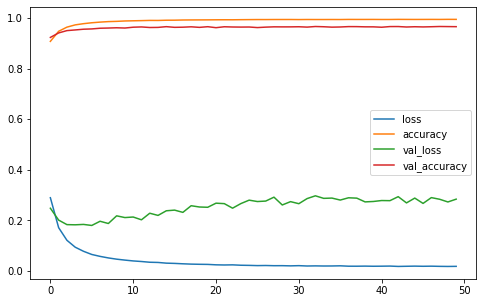

In [454]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [455]:
y_pred0 = model_LSTM.predict(X_test)
y_pred0=np.argmax(y_pred0, axis=1)
y_test0=np.argmax(y_test, axis=1)
print(classification_report(y_test0, y_pred0))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1805
           1       0.85      0.78      0.81       845
           2       0.98      0.99      0.98     18756

    accuracy                           0.97     21406
   macro avg       0.90      0.88      0.89     21406
weighted avg       0.97      0.97      0.97     21406



Untuk model default ini, model LSTM dari segi score accuracy sudah bagus, menunjukan nilai 0.9, tetapi terdapat overfitting dan belum konvergen, maka dari itu saya coba menambahkan parameter lain.

## LSTM + Drop out

In [456]:
count_vectorizer = TextVectorization(max_tokens=25000, 
                                    split="whitespace", 
                                    output_sequence_length=max_length)

In [457]:
token = Tokenizer(num_words=3000, split=' ')

In [458]:
count_vectorizer.adapt(train_sent)

In [459]:
embedding = layers.Embedding(input_dim=25000,
                             output_dim=150,
                             input_length=9)

In [464]:
inputs = layers.Input(shape=(1,), dtype="string")
x = count_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64, dropout=0.5)(x)
x = layers.Dense(75)(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(85)(x)
x = layers.Dropout(0.5)(x)
print(x.shape)
outputs = layers.Dense(3, activation="softmax")(x)
model_LSTM2 = tf.keras.Model(inputs, outputs, name="LSTM")

(None, 9, 150)
(None, 85)


In [465]:
model_LSTM2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

In [466]:
history = model_LSTM2.fit(train_sent,
                          train_labels,
                          batch_size=64,
                          epochs=50,
                          validation_data=(val_sent, val_labels))

Epoch 1/50
1071/1071 [==============================] - 24s 18ms/step - loss: 0.2160 - accuracy: 0.9377 - val_loss: 0.2087 - val_accuracy: 0.9385
Epoch 2/50
1071/1071 [==============================] - 16s 15ms/step - loss: 0.1996 - accuracy: 0.9436 - val_loss: 0.2214 - val_accuracy: 0.9396
Epoch 3/50
1071/1071 [==============================] - 16s 15ms/step - loss: 0.1969 - accuracy: 0.9458 - val_loss: 0.3129 - val_accuracy: 0.9365
Epoch 4/50
1071/1071 [==============================] - 15s 14ms/step - loss: 0.2059 - accuracy: 0.9423 - val_loss: 0.2777 - val_accuracy: 0.9379
Epoch 5/50
1071/1071 [==============================] - 15s 14ms/step - loss: 0.2021 - accuracy: 0.9435 - val_loss: 0.2535 - val_accuracy: 0.9389
Epoch 6/50
1071/1071 [==============================] - 15s 14ms/step - loss: 0.1912 - accuracy: 0.9458 - val_loss: 0.2802 - val_accuracy: 0.9388
Epoch 7/50
1071/1071 [==============================] - 15s 14ms/step - loss: 0.1936 - accuracy: 0.9466 - val_loss: 0.2444 -

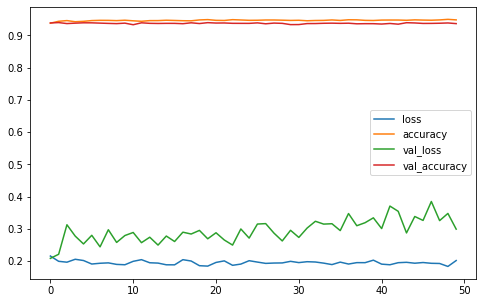

In [467]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [468]:
y_pred2 = model_LSTM2.predict(X_test)
y_pred2=np.argmax(y_pred2, axis=1)
y_test2=np.argmax(y_test, axis=1)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1805
           1       0.66      0.52      0.58       845
           2       0.97      0.98      0.97     18756

    accuracy                           0.94     21406
   macro avg       0.81      0.76      0.78     21406
weighted avg       0.94      0.94      0.94     21406



Dari model LSTM + Drop out ini, dari segi overfitting, sudah cukup teratasi, lebih baik dari model sebelumnya, tetapi tetap dikatakan overfitting, tetapi lebih baik dari model sebelumnya walaupun terdapat sedikit penurunan accuracy, namun untuk overfitting sudah lebih baik dari model sebelumnya, dan jika dilihat dari loss nya cenderung naik turun menandakan bahwa model ini juga tidak mengalami vanishing gradient. jadi menurut saya, model kedua ini merupakan model yang sedikit lebih baik dari model yang default

In [ ]:
# inputs = layers.Input(shape=(1,), dtype="string")
# x = count_vectorizer(inputs)
# x = embedding(x)
# print(x.shape)
# x = layers.LSTM(75, dropout=0.5, recurrent_dropout=0.5)(x)
# x = layers.Dense(37)(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(18)(x)
# x = layers.Dropout(0.5)(x)
# print(x.shape)
# outputs = layers.Dense(3, activation="softmax")(x)
# model_LSTM3 = tf.keras.Model(inputs, outputs, name="LSTM")

In [ ]:
# inputs = layers.Input(shape=(1,), dtype="string")
# x = count_vectorizer(inputs)
# x = embedding(x)
# print(x.shape)
# x = layers.LSTM(75, dropout=0.5, recurrent_dropout=0.5)(x)
# x = layers.Dense(37)(x)
# x = layers.Dropout(0.3)(x)
# x = layers.Dense(18)(x)
# x = layers.Dropout(0.3)(x)
# print(x.shape)
# outputs = layers.Dense(3, activation="softmax")(x)
# model_LSTM3 = tf.keras.Model(inputs, outputs, name="LSTM")

In [ ]:
# inputs = layers.Input(shape=(1,), dtype="string")
# x = count_vectorizer(inputs)
# x = embedding(x)
# print(x.shape)
# x = layers.LSTM(75, dropout=0.5, recurrent_dropout=0.5)(x)
# x = layers.Dense(37)(x)
# x = layers.Dropout(0.7)(x)
# x = layers.Dense(18)(x)
# x = layers.Dropout(0.7)(x)
# print(x.shape)
# outputs = layers.Dense(3, activation="softmax")(x)
# model_LSTM3 = tf.keras.Model(inputs, outputs, name="LSTM")

## Model Inference

Dari model diatas, saya memilih mencoba menggunakan kedua model untuk mencoba di test dengan data baru

In [481]:
tryd = pd.DataFrame()
tryd['text'] = ["barang bagus, top sekali"]

In [482]:
tryd['pred'] = tryd['text'].apply(lambda x : preproc(x))

In [483]:
tryd['pred'] = tryd['text'].apply(remove_stopwords)

In [484]:
predict = model_LSTM.predict(tryd['pred'])

if predict.argmax(axis=1) == 0:
  print("Review Negatif")
elif predict.argmax(axis=1) == 1:
  print("Review Neutral")
else:
  print("Review Positif")

Review Positif


In [477]:
tryd1 = pd.DataFrame()
tryd1['text'] = ["barang jelek, pengiriman lama"]

In [478]:
tryd1['pred'] = tryd1['text'].apply(lambda x : preproc(x))

In [479]:
tryd1['pred'] = tryd1['text'].apply(remove_stopwords)

In [480]:
predict = model_LSTM2.predict(tryd1['pred'])

if predict.argmax(axis=1) == 0:
  print("Review Negatif")
elif predict.argmax(axis=1) == 1:
  print("Review Neutral")
else:
  print("Review Positif")

Review Negatif


Dari kedua model yang di test dengan data baru, keduanya tidak menunjukan predict yang berbeda, keduanya dapat mempredict data baru dengan baik, namun dari kedua model ini dapat dimaksimalkan lagi performanya, baik dari segi tuning model atau menghandle kata2 campuran dengan bahasa asing, atau menghandle singkatan.

# Kesimpulan

- kebanyakan pelanggan memberikan rating 4-5 atau memberikan review positif
- Dari review negatif, kebanyakan pelanggan mengeluhkan tentang kemiripan barang dengan gambar dan ketepatan pengiriman
- Dari review positif, pelanggan juga memberikan review bagus untuk barang dan pengiriman
- Model yang digunakan adalah LSTM
- Model ini menggunakan model default dan menambahkan dense dan dropout
- Kedua model ini masih mengalami sedikit overfitting walaupun nilai accuracy nya bagus
- Model ini sudah cukup untuk sentimen analysis tetapi masih bisa dimaksimalkan dengan menghilangkan issue overfitting tersebut